In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('metadata/update_spines_surface_area.csv')
data

,species,spine mean,spine SD,spine SEM,spine N,spine sum,shaft sum
0,human,4.37,2.83,0.32,77,336.26,560.54
1,human,3.90,2.59,0.25,103,401.86,655.28
2,human,3.96,2.48,0.21,145,574.50,759.44
3,human,4.92,2.88,0.27,111,546.63,643.97
4,mouse,2.81,1.45,0.12,151,423.93,391.57
5,mouse,3.58,1.70,0.15,128,457.96,368.82
6,mouse,2.87,1.24,0.10,150,430.22,297.82
7,mouse,3.35,1.61,0.16,106,354.72,294.51


In [3]:
msel = data['species'] == 'mouse'
hsel = data['species'] == 'human'

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
Set1 = mpl.colormaps['Set1']
Pastel1 = mpl.colormaps['Pastel1']
mcolor = Set1(0.0)
hcolor = Set1(1.0/9)
mcolor_light = Pastel1(0.0)
hcolor_light = Pastel1(1.0/9)

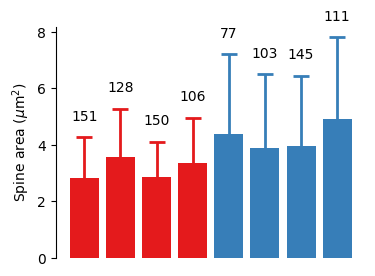

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(range(len(data[msel])), data['spine mean'][msel], 
       yerr=data['spine SD'][msel], 
       color=mcolor, label='Mouse',
       error_kw={'ecolor': mcolor, 'linewidth': 2, 'capsize': 6, 'capthick':2})

ax.bar(range(len(data[msel]), len(data[msel]) + len(data[hsel])), data['spine mean'][hsel], 
       yerr=data['spine SD'][hsel], 
       color=hcolor, label='Human',
       error_kw={'ecolor': hcolor, 'linewidth': 2, 'capsize': 6, 'capthick':2})

for x, spines in enumerate(zip(data['spine mean'][msel] + data['spine SD'][msel], [f"{n}" for n in data['spine N'][msel]])):
    ax.text(x, spines[0]+0.5, f'{spines[1]}', ha='center', va='bottom')

for x, spines in enumerate(zip(data['spine mean'][hsel] + data['spine SD'][hsel], [f"{n}" for n in data['spine N'][hsel]])):
    ax.text(x + len(data[msel]), spines[0]+0.5, f'{spines[1]}', ha='center', va='bottom')

ax.set_ylabel('Spine area ($\mu$m$^2$)')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
fig.savefig('images/shaft-spines-1.pdf')

In [7]:
print('Mean spine area (mouse):')
sum(data['spine mean'][msel] * data['spine N'][msel]) / sum(data[msel]['spine N'])

Mean spine area (mouse):


3.1180373831775703

In [8]:
print('Mean spine area (human):')
sum(data['spine mean'][hsel] * data['spine N'][hsel]) / sum(data[hsel]['spine N'])

Mean spine area (human):


4.2626376146789

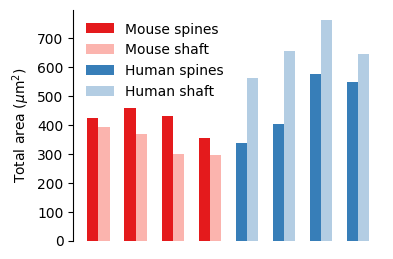

In [9]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(np.array(range(len(data[msel])))-0.15, data['spine sum'][msel], 
       width=0.3, color=mcolor, label='Mouse spines')
ax.bar(np.array(range(len(data[msel])))+0.15, data['shaft sum'][msel], 
       width=0.3, color=mcolor_light, label='Mouse shaft')

ax.bar(len(data[hsel]) + np.array(range(len(data[hsel])))-0.15, data['spine sum'][hsel], 
       width=0.3, color=hcolor, label='Human spines')
ax.bar(len(data[hsel]) + np.array(range(len(data[hsel])))+0.15, data['shaft sum'][hsel], 
       width=0.3, color=hcolor_light, label='Human shaft')

ax.set_ylabel('Total area ($\mu$m$^2$)')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.legend(frameon=False)
fig.savefig('images/shaft-spines-2.pdf')

In [10]:
print('Area correction factor F_spines (mouse):')
mfspines = sum(data['spine sum'][msel] + data['shaft sum'][msel]) / sum(data['shaft sum'][msel])
mfspines

Area correction factor F_spines (mouse):


2.232206221538825

In [11]:
((data['spine sum'][msel] + data['shaft sum'][msel]) / (data['shaft sum'][msel])).std()

0.1503671243616074

In [12]:
print('Area correction factor F_spines (human):')
hfspines = sum(data['spine sum'][hsel] + data['shaft sum'][hsel]) / sum(data['shaft sum'][hsel])
hfspines

Area correction factor F_spines (human):


1.7098460234496395

In [13]:
((data['spine sum'][hsel] + data['shaft sum'][hsel]) / (data['shaft sum'][hsel])).std()

0.11944998165809899

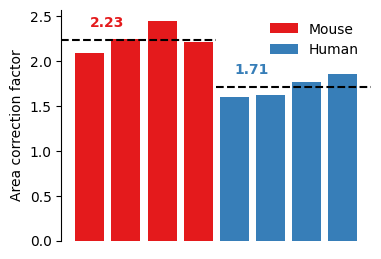

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.bar(range(len(data[msel])), 
       (data['spine sum'][msel] + data['shaft sum'][msel]) / data['shaft sum'][msel], 
       color=mcolor, label='Mouse')
ax.axhline(mfspines, 0, 0.5, color='black', linestyle='--')
ax.text(0, mfspines + 0.15, f'{mfspines:.2f}', color=mcolor, weight='bold')

ax.bar(len(data[hsel]) + np.array(range(len(data[hsel]))), 
       (data['spine sum'][hsel] + data['shaft sum'][hsel]) / data['shaft sum'][hsel], 
       color=hcolor, label='Human')
ax.axhline(hfspines, 0.5, 1.0, color='black', linestyle='--')
ax.text(4, hfspines + 0.15, f'{hfspines:.2f}', color=hcolor, weight='bold')


ax.set_ylabel('Area correction factor')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.legend(frameon=False)
fig.savefig('images/shaft-spines-3.pdf')